<a href="https://colab.research.google.com/github/jbinteam/010723305/blob/main/Homework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pylab as plt
from skimage import io

<h1 style="text-align: center">Image warping with OpenCV</h1>
<h2 style="text-align: center"><a href="https://docs.opencv.org/4.5.3/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983">warpAffine</a> is a built-in function inside
<a href = "https://docs.opencv.org/4.5.3/da/d54/group__imgproc__transform.html"> Geometric Image Transformation </a> of an OpenCV module
</h2> 

In [2]:
def imshow_compare(img1, img2) :
    fig,axes = plt.subplots(1,2, figsize= (10, 10))
    axes[0].imshow(img1, cmap='gray')
    axes[1].imshow(img2, cmap='gray')

In [3]:
example_img_url = "https://raw.githubusercontent.com/jbinteam/010723305/main/images/lena%20image%20gray.png"
img = io.imread(example_img_url)

<h2 style="text-align:center">Image Scaling</h2>

$$ M = \left[ \begin{matrix} S_x&&0&&0 \\ 0&&S_y&&0 \\ 0&&0&&1 \end{matrix}\right]$$

<h2> The similarly build-in function of the below block is <a href = "https://docs.opencv.org/4.5.3/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d">resize </a></h2>

In [4]:
def img_scaling(img, sx = 1, sy =1) :
    rows, cols = img.shape[:2]
    scaled_cols = sx*cols
    scaled_rows = sy*rows
    M = np.float32([[sx, 0, 0],[0 , sy, 0]]) #Homogenous scaling matrix
    scaled_img = cv2.warpAffine(img, M, (scaled_cols,scaled_rows))
    return scaled_img

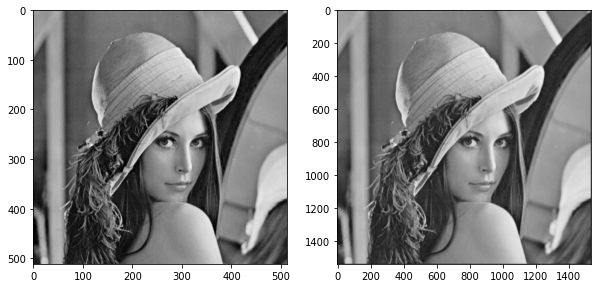

In [5]:
img_scaled = img_scaling(img,3,3)
imshow_compare(img, img_scaled)

<h2 style="text-align:center">Image Translation</h2>

$$ M = \left[ \begin{matrix} 1&&0&&t_x \\ 0&&1&&t_y \\ 0&&0&&1 \end{matrix}\right]$$

In [6]:
def img_translation(img, tx = 0, ty =0) :
    rows, cols = img.shape[:2]
    translated_cols = cols + tx # increase x axis
    translated_rows = rows + ty # increase y axis
    
    M = np.float32([[1, 0, tx],[0 , 1, ty]]) #Homogenous tranlation matrix
    translated_img = cv2.warpAffine(img, M, (translated_cols,translated_rows))
    return translated_img

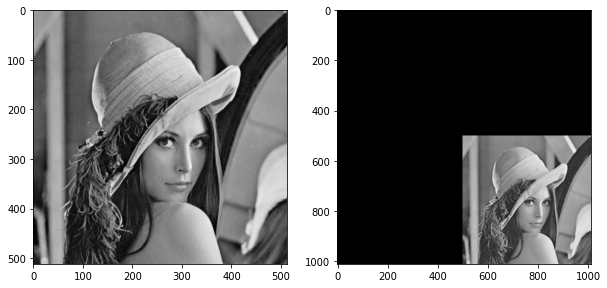

In [7]:
img_translated = img_translation(img, 500, 500)
imshow_compare(img, img_translated)

<h2 style="text-align:center">Image Rotation</h2>

$$ M = \left[ \begin{matrix} cos(\theta)&&-sin(\theta)&&0 \\ sin(\theta)&&cos(\theta)&&0 \\ 0&&0&&1 \end{matrix}\right]$$

In [8]:
def img_rotation(img, theta) :
    theta_rad = -theta * np.pi/180 # Multiply with -1 to flip direction
    rows, cols = img.shape[:2]
    cos_t = np.cos(theta_rad) # For optimization purpose
    sin_t = np.sin(theta_rad) # For optimization purpose
    
    M = np.float32([[cos_t, -sin_t, 0],[sin_t , cos_t, 0]]) #Homogenous rotation matrix
    rotated_img = cv2.warpAffine(img, M, (cols, rows))
    return rotated_img

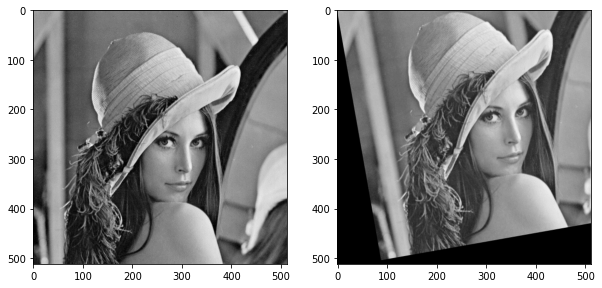

In [9]:
img_rotated = img_rotation(img, 10)
imshow_compare(img, img_rotated)

<h2> For convenience OpenCV also provided function <a href="https://docs.opencv.org/4.5.3/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326"> getRotationMatrix2D() </a> to getting Affine transformation matrix which rotates along a defined center point </h2>

In [10]:
def img_rotation_center(img, theta) :
    rows, cols = img.shape[:2] 
    R = cv2.getRotationMatrix2D((cols/2, rows/2), theta, 1)
    print(R)
    rotated_img = cv2.warpAffine(img, R, (cols, rows))
    return rotated_img

[[  0.8660254    0.5        -93.70250337]
 [ -0.5          0.8660254  162.29749663]]


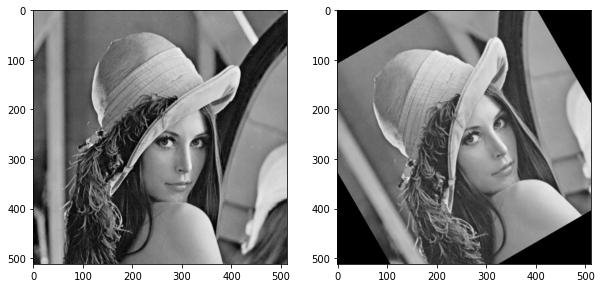

In [11]:
img_center_rotated = img_rotation_center(img,30)
imshow_compare(img, img_center_rotated)

<h2 style="text-align:center">Affine transform</h2>

$$ M = \left[ \begin{matrix} a_{00}&&a_{01}&&a_{02} \\ a_{10}&&a_{11}&&a_{12} \\ 0&&0&&1 \end{matrix}\right]$$

<h2> You can estimate an affine matrix with a built-in function <a href = "https://docs.opencv.org/4.5.3/da/d54/group__imgproc__transform.html#ga47069038267385913c61334e3d6af2e0"> getAffineTransform() </a> </h2>

[[0.49902153 0.24853229 0.        ]
 [0.5        1.         0.        ]]


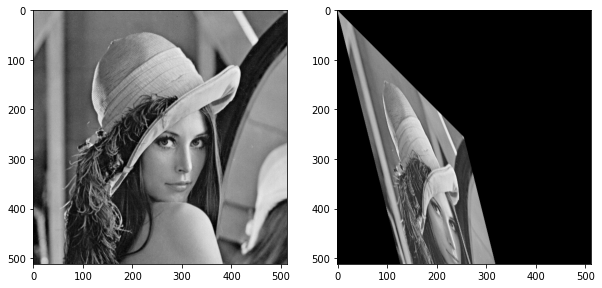

In [12]:
rows, cols = img.shape[:2]
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[0,0], [int(0.5*(cols-1)),0.5*(rows-1)], [int(0.25*(cols-1)),rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
warped_img = cv2.warpAffine(img, affine_matrix, (cols,rows))
print(affine_matrix)
imshow_compare(img, warped_img)

<h2 style="text-align:center">Projective/Homography transform</h2>

$$ M = \left[ \begin{matrix} h_{00}&&h_{01}&&h_{02} \\ h_{10}&&h_{11}&&h_{12} \\ h_{20}&&h_{21}&&h_{22} \end{matrix}\right]$$

<h2> As same as affine transform, you can estimate homography matrix by <a href = "https://docs.opencv.org/4.5.3/da/d54/group__imgproc__transform.html#ga20f62aa3235d869c9956436c870893ae">getPerspectiveTransform()</a>
or 
<a href = "https://docs.opencv.org/4.5.3/d9/d0c/group__calib3d.html#ga4abc2ece9fab9398f2e560d53c8c9780"> 
</a> if you want to estimate it with RANSAC, you also can use
<a href = "https://docs.opencv.org/4.5.3/d9/d0c/group__calib3d.html#ga4abc2ece9fab9398f2e560d53c8c9780">
    findHomography()
</a>
</h2>

<h2> Then use <a href = "https://docs.opencv.org/4.5.3/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87" > warpPerspective() </a> to warp image</h2>

[[ 5.41792117e-01 -1.30656464e-01  1.00000000e+02]
 [ 8.65243503e-02  4.22458661e-01  5.00000000e+01]
 [-1.13230079e-04 -6.56182114e-04  1.00000000e+00]]


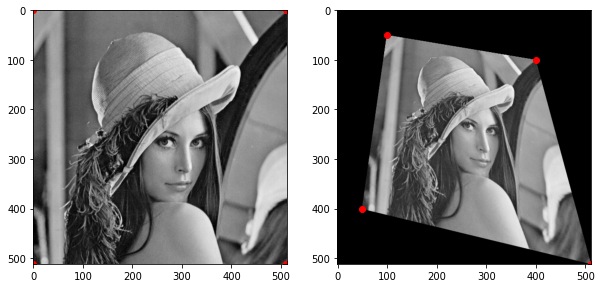

In [13]:
rows, cols = img.shape[:2]
# points before warping  [0,0]   [cols-1, 0]  [0, rows-1]  [cols-1, rows-1]
#                        TL      TR           BL           BR
#                        Topleft Topright     Bottomleft   Bottomright 
src_points = np.float32([[0,0],  [cols-1, 0], [0, rows-1], [cols-1, rows-1]])
# points after warping 
#                        Topleft   Topright   Bottomleft Bottomright
dst_points = np.float32([[100,50], [400,100], [50,400],  [cols-1,rows-1]]) 
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
print(projective_matrix)
warped_img = cv2.warpPerspective(img, projective_matrix, (cols,rows))
# imshow_compare(img, warped_img)
fig,axes = plt.subplots(1,2, figsize= (10, 10))
axes[0].imshow(img, cmap='gray')
# Points annotate
axes[0].plot(0, 0, 'ro') # Top left
axes[0].plot(cols-1, 0, 'ro') # Top right
axes[0].plot(0, rows-1, 'ro') # Bottom left
axes[0].plot(cols-1, rows-1, 'ro') # Bottom right

axes[1].imshow(warped_img, cmap='gray')
axes[1].plot(100, 50, 'ro') # Top left
axes[1].plot(400, 100, 'ro') # Top right
axes[1].plot(50, 400, 'ro') # Bottom left
axes[1].plot(cols-1, rows-1, 'ro') # Bottom right



<h1 style="text-align: center"> Perspective transformation exercise</h1>

<h2>แบบฝึกหัดที่ 9.1</h2>
<h4>วัตถุประสงค์ </h1>

- ทักษะการประยุกต์ใช้ image warping ในการปรับปรุงภาพ

<h4>โจทย์</h4>

- ให้นักศึกษาเขียน code ซอฟต์แวร์สแกนเอกสารโดยตรวจจับแผ่นเอกสารรูปทรงสี่เหลี่ยมและแปลงภาพด้วย perspective warping เพื่อให้มุมมองภาพเป็นมุมมองที่ตั้งฉากดังที่แสดงในภาพตัวอย่างด้านล่าง (อัตราส่วนของหนังสือ กว้าง: สูง = 1: 1.4142)

- ให้นักศึกษาเลือกเอาภาพใดภาพหนึ่งจาก <a href = "https://github.com/jbinteam/010723305/tree/main/images"> https://github.com/jbinteam/010723305/tree/main/images </a> <br>
<a href="https://raw.githubusercontent.com/jbinteam/010723305/main/images/Perspective%20image%20(1).jpg"> https://raw.githubusercontent.com/jbinteam/010723305/main/images/Perspective%20image%20(1).jpg </a> <br>
<a href="https://raw.githubusercontent.com/jbinteam/010723305/main/images/Perspective%20image%20(2).jpg"> https://raw.githubusercontent.com/jbinteam/010723305/main/images/Perspective%20image%20(2).jpg </a> <br>
<a href="https://raw.githubusercontent.com/jbinteam/010723305/main/images/Perspective%20image%20(3).jpg"> https://raw.githubusercontent.com/jbinteam/010723305/main/images/Perspective%20image%20(3).jpg </a> <br>

- ผลลัพธ์ที่คาดหวัง

<img src = "https://raw.githubusercontent.com/jbinteam/010723305/main/images/Perspective(1)_result.png"> <br>
<img src = "https://raw.githubusercontent.com/jbinteam/010723305/main/images/Perspective(2)_result.png"> <br>
<img src = "https://raw.githubusercontent.com/jbinteam/010723305/main/images/Perspective(3)_result.png">

In [14]:
## Coding here ## :)